In [28]:
import numpy as np
import math


np.random.seed(42)

class Example2D():
    def __init__(self,x,y,label):
        self.x = x
        self.y = y
        self.label = label

    def __repr__(self):
        return "x: {}, y:{}, label:{}".format(self.x,self.y,self.label)
class Point():
    def __init__(self,x,y):
        self.x = x
        self.y = y


def getCirclelabel(p,center,radius):
    return 1 if (dist(p,center) < (radius * 0.5 )) else 0

def getCircleData(numSamples,noise):

    points = []
    radius = 5

    for i in range(0 , int(numSamples/2) ):
        r = np.random.uniform(0, radius * 0.5)
        angle = np.random.uniform(0, 2* math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        noiseX = np.random.uniform(-radius,radius) *noise
        noiseY = np.random.uniform(-radius,radius) *noise

        label = getCirclelabel( Point( x = x + noiseX , y = y + noiseY ), Point(x=0,y=0),radius)
        points.append(Example2D(x,y,label))

    for i in range(0 , int(numSamples/2) ):
        # r = np.random.uniform(0, radius * 0.5)
        r = radius
        angle = np.random.uniform(0, 2* math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        noiseX = np.random.uniform(-radius,radius) *noise
        noiseY = np.random.uniform(-radius,radius) *noise

        label = getCirclelabel( Point( x = x + noiseX , y = y + noiseY ), Point(x=0,y=0),radius)
        points.append(Example2D(x,y,label))

    return points

def dist(a:Point, b:Point):
    dx = a.x - b.x 
    dy = a.y - b.y
    return math.sqrt(dx*dx + dy*dy)

def getTraingData(data_points_count = 1000,noise=0):
    
    points = getCircleData(numSamples= data_points_count,noise=noise)
    x1 = [point.x for point in points]
    x2 = [point.y for point in points]

    x1 = np.array(x1)
    x2 = np.array(x2)

    label = [point.label for point in points]

    return x1, x2, label


In [36]:
x1,x2,label = getTraingData(1000,0.0)

In [30]:
import pandas as pd
import numpy as np
from scipy.special import expit

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


import seaborn as sns


In [37]:
df = pd.DataFrame({'x1':x1,'x2':x2,'label':label})

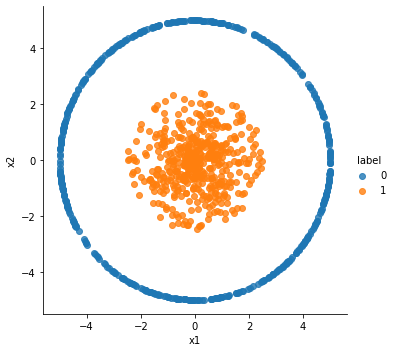

In [38]:

sns.lmplot(x= 'x1',y='x2',hue = 'label',data= df,fit_reg=False)